# 🐼 Pandas Practice and Data Analysis
This notebook demonstrates hands-on practice with **pandas**, covering data creation, manipulation, cleaning, aggregation, and simple visualization.

Dataset used: `housing_sample_2000_v2.csv` (synthetic dataset).

## 1️⃣ Creating and Inspecting a Series

In [1]:
import pandas as pd

##### Series is homogenous values because it consists of only either integers or objects, if one value becomes string in an integer series then whole series was converted into object

In [19]:
s = pd.Series([10,20,30,40,50])

In [20]:
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [21]:
s.dtype

dtype('int64')

In [22]:
s.values

array([10, 20, 30, 40, 50])

In [23]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [24]:
print(s.name)

None


In [25]:
s.name = "Calories"
print(s.name)

Calories


In [26]:
s

0    10
1    20
2    30
3    40
4    50
Name: Calories, dtype: int64

In [27]:
print(s)

0    10
1    20
2    30
3    40
4    50
Name: Calories, dtype: int64


In [28]:
# indexing
s[0]

np.int64(10)

In [29]:
s[0:3] # start(included) : stop(excluded) : step(values to jump)

0    10
1    20
2    30
Name: Calories, dtype: int64

In [30]:
s[2:5]

2    30
3    40
4    50
Name: Calories, dtype: int64

In [31]:
# iloc -> location based indexing
s.iloc[2:4] # if indexes are in the form of integers

2    30
3    40
Name: Calories, dtype: int64

In [32]:
s.iloc[3]

np.int64(40)

In [33]:
s.iloc[[1,3,4]]

1    20
3    40
4    50
Name: Calories, dtype: int64

In [34]:
index = ["Apple","Banana","Orange","Grapes","Strawberry"]

In [35]:
s.index = index

In [36]:
s.index

Index(['Apple', 'Banana', 'Orange', 'Grapes', 'Strawberry'], dtype='object')

In [37]:
s['Grapes']

np.int64(40)

In [39]:
s.iloc[3] # Here we couldn't remember the location or index number of indexes so we use the loc function

np.int64(40)

In [41]:
# loc -> label based indexing
s.loc['Grapes'] # by using loc function we directly give the index name

np.int64(40)

In [42]:
s.loc[['Grapes','Apple']]

Grapes    40
Apple     10
Name: Calories, dtype: int64

In [43]:
# In label based indexing your start as well as stop value both are included in the output.
s['Apple':'Grapes']

Apple     10
Banana    20
Orange    30
Grapes    40
Name: Calories, dtype: int64

In [44]:
fruit_protein = {
    "Avocado": 2.0,       # grams of protein
    "Guava": 2.6,
    "Blackberries": 2.0,
    "Oranges": 0.9,
    "Banana": 1.1,
    "Apples": 0.3,
    "Kiwi": 1.1,
    "Pomegranate": 1.7,
    "Mango": 0.8,
    "Cherries": 1.0
}

In [45]:
s2 = pd.Series(fruit_protein)

In [46]:
s2

Avocado         2.0
Guava           2.6
Blackberries    2.0
Oranges         0.9
Banana          1.1
Apples          0.3
Kiwi            1.1
Pomegranate     1.7
Mango           0.8
Cherries        1.0
dtype: float64

In [48]:
s2.name = 'Proteins'

In [49]:
s2

Avocado         2.0
Guava           2.6
Blackberries    2.0
Oranges         0.9
Banana          1.1
Apples          0.3
Kiwi            1.1
Pomegranate     1.7
Mango           0.8
Cherries        1.0
Name: Proteins, dtype: float64

In [50]:
# Conditional Selection
s2>1

Avocado          True
Guava            True
Blackberries     True
Oranges         False
Banana           True
Apples          False
Kiwi             True
Pomegranate      True
Mango           False
Cherries        False
Name: Proteins, dtype: bool

In [51]:
s2[s2>1]

Avocado         2.0
Guava           2.6
Blackberries    2.0
Banana          1.1
Kiwi            1.1
Pomegranate     1.7
Name: Proteins, dtype: float64

In [52]:
# Logical Operators: and, or, not
s2[(s2>0.5) | (s2<=2.0)]

Avocado         2.0
Guava           2.6
Blackberries    2.0
Oranges         0.9
Banana          1.1
Apples          0.3
Kiwi            1.1
Pomegranate     1.7
Mango           0.8
Cherries        1.0
Name: Proteins, dtype: float64

In [53]:
s2[(s2>0.5) & (s2<=2.0)]

Avocado         2.0
Blackberries    2.0
Oranges         0.9
Banana          1.1
Kiwi            1.1
Pomegranate     1.7
Mango           0.8
Cherries        1.0
Name: Proteins, dtype: float64

In [54]:
s2[~(s2>1)]

Oranges     0.9
Apples      0.3
Mango       0.8
Cherries    1.0
Name: Proteins, dtype: float64

In [56]:
# Modifying the series
s2['Mango'] = 2.8

In [57]:
s2

Avocado         2.0
Guava           2.6
Blackberries    2.0
Oranges         0.9
Banana          1.1
Apples          0.3
Kiwi            1.1
Pomegranate     1.7
Mango           2.8
Cherries        1.0
Name: Proteins, dtype: float64

In [62]:
import numpy as np
ser = pd.Series(['a',np.nan,1,np.nan,2])
ser # here we can see that even series contains one string values also it converts the entire series into object

0      a
1    NaN
2      1
3    NaN
4      2
dtype: object

In [59]:
ser.notnull().sum()

np.int64(3)

In [61]:
ser.isnull().sum()

np.int64(2)

## 2️⃣ Creating and Exploring a DataFrame

In [63]:
# DataFrame:

data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve", "Alice"],
    "Age": [25, 30, 35, np.nan, 29, 25],
    "Department": ["HR", "IT", "Finance", "IT", "HR", "HR"],
    "Salary": [50000, 60000, 70000, 62000, np.nan, 50000]
}

In [65]:
df = pd.DataFrame(data)
df

,Name,Age,Department,Salary
0,Alice,25.0,HR,50000.0
1,Bob,30.0,IT,60000.0
2,Charlie,35.0,Finance,70000.0
3,David,NaN,IT,62000.0
4,Eve,29.0,HR,NaN
5,Alice,25.0,HR,50000.0


In [67]:
df.head() # it automatically gives top 5 rows even we cant give parameters

,Name,Age,Department,Salary
0,Alice,25.0,HR,50000.0
1,Bob,30.0,IT,60000.0
2,Charlie,35.0,Finance,70000.0
3,David,NaN,IT,62000.0
4,Eve,29.0,HR,NaN


In [70]:
df.head(3) # it gives top 3rows

,Name,Age,Department,Salary
0,Alice,25.0,HR,50000.0
1,Bob,30.0,IT,60000.0
2,Charlie,35.0,Finance,70000.0


In [71]:
df.tail() # it gives last five rows

,Name,Age,Department,Salary
1,Bob,30.0,IT,60000.0
2,Charlie,35.0,Finance,70000.0
3,David,NaN,IT,62000.0
4,Eve,29.0,HR,NaN
5,Alice,25.0,HR,50000.0


In [72]:
# loc and iloc
df.iloc[0:4,:2] # rows,columns

,Name,Age
0,Alice,25.0
1,Bob,30.0
2,Charlie,35.0
3,David,NaN


In [73]:
df.iloc[0:4,[0,2]]

,Name,Department
0,Alice,HR
1,Bob,IT
2,Charlie,Finance
3,David,IT


In [75]:
df.loc[0:4,['Name','Department']]  # here the major difference is that stop value also included and dont need to remember the index numbers

,Name,Department
0,Alice,HR
1,Bob,IT
2,Charlie,Finance
3,David,IT
4,Eve,HR


In [76]:
df[['Name','Department']]

,Name,Department
0,Alice,HR
1,Bob,IT
2,Charlie,Finance
3,David,IT
4,Eve,HR
5,Alice,HR


In [79]:
df.drop('Age',axis=1) # it doesn't delete from the original dataframe

,Name,Department,Salary
0,Alice,HR,50000.0
1,Bob,IT,60000.0
2,Charlie,Finance,70000.0
3,David,IT,62000.0
4,Eve,HR,NaN
5,Alice,HR,50000.0


In [80]:
df

,Name,Age,Department,Salary
0,Alice,25.0,HR,50000.0
1,Bob,30.0,IT,60000.0
2,Charlie,35.0,Finance,70000.0
3,David,NaN,IT,62000.0
4,Eve,29.0,HR,NaN
5,Alice,25.0,HR,50000.0


In [81]:
df.shape

(6, 4)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        6 non-null      object 
 1   Age         5 non-null      float64
 2   Department  6 non-null      object 
 3   Salary      5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 324.0+ bytes


In [86]:
df.describe()

,Age,Salary
count,5.000000,5.000000
mean,28.800000,58400.000000
std,4.147288,8532.291603
min,25.000000,50000.000000
25%,25.000000,50000.000000
50%,29.000000,60000.000000
75%,30.000000,62000.000000
max,35.000000,70000.000000


In [90]:
df['Salary'] = df['Salary'] + 500 # Broadcasting

In [88]:
df['Salary']

0    50500.0
1    60500.0
2    70500.0
3    62500.0
4        NaN
5    50500.0
Name: Salary, dtype: float64

In [89]:
df

,Name,Age,Department,Salary
0,Alice,25.0,HR,50500.0
1,Bob,30.0,IT,60500.0
2,Charlie,35.0,Finance,70500.0
3,David,NaN,IT,62500.0
4,Eve,29.0,HR,NaN
5,Alice,25.0,HR,50500.0


In [91]:
# Renaming columns
df.rename(columns = {'Department':'Dept'},inplace = True)

In [92]:
df

,Name,Age,Dept,Salary
0,Alice,25.0,HR,51000.0
1,Bob,30.0,IT,61000.0
2,Charlie,35.0,Finance,71000.0
3,David,NaN,IT,63000.0
4,Eve,29.0,HR,NaN
5,Alice,25.0,HR,51000.0


In [93]:
df['Dept'].unique()

array(['HR', 'IT', 'Finance'], dtype=object)

In [94]:
df['Dept'].value_counts()

Dept
HR         3
IT         2
Finance    1
Name: count, dtype: int64

In [95]:
df['Dept'].nunique()

3

In [96]:
# Adding a new column
df["Promoted_Salary"] = df["Salary"] * 10

In [97]:
df

,Name,Age,Dept,Salary,Promoted_Salary
0,Alice,25.0,HR,51000.0,510000.0
1,Bob,30.0,IT,61000.0,610000.0
2,Charlie,35.0,Finance,71000.0,710000.0
3,David,NaN,IT,63000.0,630000.0
4,Eve,29.0,HR,NaN,NaN
5,Alice,25.0,HR,51000.0,510000.0


In [98]:
# Data Cleaning
df.isnull().sum()

Name               0
Age                1
Dept               0
Salary             1
Promoted_Salary    1
dtype: int64

In [99]:
df.dropna(how = "any") # any row that had any null value

,Name,Age,Dept,Salary,Promoted_Salary
0,Alice,25.0,HR,51000.0,510000.0
1,Bob,30.0,IT,61000.0,610000.0
2,Charlie,35.0,Finance,71000.0,710000.0
5,Alice,25.0,HR,51000.0,510000.0


In [100]:
df.dropna(how = "all") # if all the values in any row are null then we drop that row

,Name,Age,Dept,Salary,Promoted_Salary
0,Alice,25.0,HR,51000.0,510000.0
1,Bob,30.0,IT,61000.0,610000.0
2,Charlie,35.0,Finance,71000.0,710000.0
3,David,NaN,IT,63000.0,630000.0
4,Eve,29.0,HR,NaN,NaN
5,Alice,25.0,HR,51000.0,510000.0


In [101]:
df

,Name,Age,Dept,Salary,Promoted_Salary
0,Alice,25.0,HR,51000.0,510000.0
1,Bob,30.0,IT,61000.0,610000.0
2,Charlie,35.0,Finance,71000.0,710000.0
3,David,NaN,IT,63000.0,630000.0
4,Eve,29.0,HR,NaN,NaN
5,Alice,25.0,HR,51000.0,510000.0


In [102]:
df['Age'].fillna(df['Age'].mean())

0    25.0
1    30.0
2    35.0
3    28.8
4    29.0
5    25.0
Name: Age, dtype: float64

In [103]:
df['Salary'].fillna(df['Salary'].median())

0    51000.0
1    61000.0
2    71000.0
3    63000.0
4    61000.0
5    51000.0
Name: Salary, dtype: float64

In [105]:
df['Age'].fillna(method='ffill')

C:\Users\99895\AppData\Local\Temp\ipykernel_4212\1265906299.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'].fillna(method='ffill')


0    25.0
1    30.0
2    35.0
3    35.0
4    29.0
5    25.0
Name: Age, dtype: float64

In [106]:
df['Age'].fillna(method='bfill')

C:\Users\99895\AppData\Local\Temp\ipykernel_4212\3224957626.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'].fillna(method='bfill')


0    25.0
1    30.0
2    35.0
3    29.0
4    29.0
5    25.0
Name: Age, dtype: float64

In [108]:
df['Name']=df['Name'].replace('Charlie','Rose')

In [109]:
df

,Name,Age,Dept,Salary,Promoted_Salary
0,Alice,25.0,HR,51000.0,510000.0
1,Bob,30.0,IT,61000.0,610000.0
2,Rose,35.0,Finance,71000.0,710000.0
3,David,NaN,IT,63000.0,630000.0
4,Eve,29.0,HR,NaN,NaN
5,Alice,25.0,HR,51000.0,510000.0


In [110]:
df[df.duplicated()]

,Name,Age,Dept,Salary,Promoted_Salary
5,Alice,25.0,HR,51000.0,510000.0


In [111]:
df_dup=df[df.duplicated(keep="last")]
df_dup

,Name,Age,Dept,Salary,Promoted_Salary
0,Alice,25.0,HR,51000.0,510000.0


In [114]:
df=df.drop_duplicates()

In [115]:
df['Promoted_Salary'] = df['Promoted_Salary'].apply(lambda x:x/10 if x > 650000 else x)

C:\Users\99895\AppData\Local\Temp\ipykernel_4212\2946683122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promoted_Salary'] = df['Promoted_Salary'].apply(lambda x:x/10 if x > 650000 else x)


In [116]:
df

,Name,Age,Dept,Salary,Promoted_Salary
0,Alice,25.0,HR,51000.0,510000.0
1,Bob,30.0,IT,61000.0,610000.0
2,Rose,35.0,Finance,71000.0,71000.0
3,David,NaN,IT,63000.0,630000.0
4,Eve,29.0,HR,NaN,NaN


In [123]:
#name = "alice_fernandes"
#df[["first_name", "last_name"]] = df["name"].str.split("_",expand=True)

In [124]:
# apply and lambda
def multiplying_age(x):
    return x * 2

df['Age'] = df['Age'].apply(multiplying_age)

C:\Users\99895\AppData\Local\Temp\ipykernel_4212\3281115099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(multiplying_age)


In [125]:
df

,Name,Age,Dept,Salary,Promoted_Salary
0,Alice,50.0,HR,51000.0,510000.0
1,Bob,60.0,IT,61000.0,610000.0
2,Rose,70.0,Finance,71000.0,71000.0
3,David,NaN,IT,63000.0,630000.0
4,Eve,58.0,HR,NaN,NaN


In [126]:
df['Age'] = df['Age'].apply(lambda x:x/2)

C:\Users\99895\AppData\Local\Temp\ipykernel_4212\896099530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(lambda x:x/2)


In [127]:
df

,Name,Age,Dept,Salary,Promoted_Salary
0,Alice,25.0,HR,51000.0,510000.0
1,Bob,30.0,IT,61000.0,610000.0
2,Rose,35.0,Finance,71000.0,71000.0
3,David,NaN,IT,63000.0,630000.0
4,Eve,29.0,HR,NaN,NaN


In [128]:
# joins and merges
department_info = {
    "Dept": ["HR", "IT", "Finance"],
    "Location": ["New York", "San Francisco", "Chicago"],
    "Manager": ["Laura", "Steve", "Nina"]
}
df2 = pd.DataFrame(department_info)
df2

,Dept,Location,Manager
0,HR,New York,Laura
1,IT,San Francisco,Steve
2,Finance,Chicago,Nina


In [129]:
# Concat
pd.concat([df,df2])

,Name,Age,Dept,Salary,Promoted_Salary,Location,Manager
0,Alice,25.0,HR,51000.0,510000.0,NaN,NaN
1,Bob,30.0,IT,61000.0,610000.0,NaN,NaN
2,Rose,35.0,Finance,71000.0,71000.0,NaN,NaN
3,David,NaN,IT,63000.0,630000.0,NaN,NaN
4,Eve,29.0,HR,NaN,NaN,NaN,NaN
0,NaN,NaN,HR,NaN,NaN,New York,Laura
1,NaN,NaN,IT,NaN,NaN,San Francisco,Steve
2,NaN,NaN,Finance,NaN,NaN,Chicago,Nina


In [130]:
pd.concat([df,df2],axis=1)

,Name,Age,Dept,Salary,Promoted_Salary,Dept,Location,Manager
0,Alice,25.0,HR,51000.0,510000.0,HR,New York,Laura
1,Bob,30.0,IT,61000.0,610000.0,IT,San Francisco,Steve
2,Rose,35.0,Finance,71000.0,71000.0,Finance,Chicago,Nina
3,David,NaN,IT,63000.0,630000.0,NaN,NaN,NaN
4,Eve,29.0,HR,NaN,NaN,NaN,NaN,NaN


In [131]:
pd.merge(df,df2,on = 'Dept')

,Name,Age,Dept,Salary,Promoted_Salary,Location,Manager
0,Alice,25.0,HR,51000.0,510000.0,New York,Laura
1,Bob,30.0,IT,61000.0,610000.0,San Francisco,Steve
2,Rose,35.0,Finance,71000.0,71000.0,Chicago,Nina
3,David,NaN,IT,63000.0,630000.0,San Francisco,Steve
4,Eve,29.0,HR,NaN,NaN,New York,Laura


## 3️⃣ Working with a Realistic Dataset

##### Importing File

In [143]:
housing_df = pd.read_csv("housing_sample_2000_v2.csv")
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2020-01-01,171958,5,2.3,828,10810,2.9,1,4,4,2382,876,1978,0,3332 Oak St,Bellevue,WA 98103,USA
1,2020-01-02,721155,1,4.5,3091,10455,1.5,0,3,4,1496,1938,1976,2015,3348 Oak St,Seattle,WA 98004,USA
2,2020-01-03,181932,1,4.7,3330,10063,2.7,0,0,1,5790,1371,1939,2010,1987 Elm St,Bellevue,WA 98103,USA
3,2020-01-04,1464414,3,4.4,3544,1834,2.7,1,1,5,3970,1381,1990,1990,3545 Cedar St,Seattle,WA 98402,USA
4,2020-01-05,309178,4,1.1,1920,2724,2.5,1,2,3,5753,1079,1920,0,6980 Pine St,Tacoma,WA 98402,USA


In [144]:
housing_df.shape

(2000, 18)

In [145]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2000 non-null   object 
 1   price          2000 non-null   int64  
 2   bedrooms       2000 non-null   int64  
 3   bathrooms      2000 non-null   float64
 4   sqft_living    2000 non-null   int64  
 5   sqft_lot       2000 non-null   int64  
 6   floors         2000 non-null   float64
 7   waterfront     2000 non-null   int64  
 8   view           2000 non-null   int64  
 9   condition      2000 non-null   int64  
 10  sqft_above     2000 non-null   int64  
 11  sqft_basement  2000 non-null   int64  
 12  yr_built       2000 non-null   int64  
 13  yr_renovated   2000 non-null   int64  
 14  street         2000 non-null   object 
 15  city           2000 non-null   object 
 16  statezip       2000 non-null   object 
 17  country        2000 non-null   object 
dtypes: float

In [146]:
housing_df['date'] = pd.to_datetime(housing_df['date'])

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2000 non-null   datetime64[ns]
 1   price          2000 non-null   int64         
 2   bedrooms       2000 non-null   int64         
 3   bathrooms      2000 non-null   float64       
 4   sqft_living    2000 non-null   int64         
 5   sqft_lot       2000 non-null   int64         
 6   floors         2000 non-null   float64       
 7   waterfront     2000 non-null   int64         
 8   view           2000 non-null   int64         
 9   condition      2000 non-null   int64         
 10  sqft_above     2000 non-null   int64         
 11  sqft_basement  2000 non-null   int64         
 12  yr_built       2000 non-null   int64         
 13  yr_renovated   2000 non-null   int64         
 14  street         2000 non-null   object        
 15  city           2000 n

In [148]:
housing_df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,2000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2022-09-26 12:00:00,7.784653e+05,4.987500,2.990850,4204.175000,10360.929000,1.983350,0.519000,2.009500,2.963500,3168.449500,1026.792000,1960.413000,1683.252500
min,2020-01-01 00:00:00,5.012600e+04,1.000000,1.000000,512.000000,1002.000000,1.000000,0.000000,0.000000,1.000000,400.000000,2.000000,1900.000000,0.000000
25%,2021-05-14 18:00:00,4.244552e+05,3.000000,2.000000,2372.000000,5432.250000,1.500000,0.000000,1.000000,2.000000,1736.250000,552.000000,1930.000000,1990.000000
50%,2022-09-26 12:00:00,7.779635e+05,5.000000,3.000000,4223.500000,10529.500000,2.000000,1.000000,2.000000,3.000000,3172.500000,1049.500000,1960.000000,2010.000000
75%,2024-02-08 06:00:00,1.136101e+06,7.000000,4.000000,5991.250000,15038.500000,2.500000,1.000000,3.000000,4.000000,4582.250000,1527.000000,1991.000000,2015.000000
max,2025-06-22 00:00:00,1.498685e+06,9.000000,5.000000,7993.000000,19976.000000,3.000000,1.000000,4.000000,5.000000,5997.000000,1999.000000,2021.000000,2020.000000
std,NaN,4.176812e+05,2.582378,1.143414,2139.806157,5510.502497,0.566682,0.499764,1.420359,1.410022,1624.710311,570.568843,35.214009,738.973968


### Checking for Missing Values

In [149]:
housing_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Filtering and Sorting Example

In [150]:
filtered = housing_df[housing_df['price'] > 1000000]
filtered_sorted = filtered.sort_values(by='price', ascending=False)
filtered_sorted.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
328,2020-11-24,1498685,2,1.1,4872,11892,1.0,0,4,5,2559,1912,1907,2015,9387 Maple St,Tacoma,WA 98052,USA
929,2022-07-18,1498021,6,4.8,3960,2506,2.4,1,0,5,1922,974,1926,2010,8080 Maple St,Bellevue,WA 98402,USA
935,2022-07-24,1497960,1,1.1,782,13616,2.2,0,1,5,4866,1012,1969,0,4598 Maple St,Kirkland,WA 98052,USA
331,2020-11-27,1497687,4,2.8,1051,7121,2.7,1,3,5,4315,514,1947,2010,7477 Maple St,Bellevue,WA 98052,USA
511,2021-05-26,1496403,5,4.1,5181,15245,1.5,1,2,4,2582,1342,1941,2020,7284 Oak St,Redmond,WA 98052,USA


## 4️⃣ Data Transformation and Aggregation

In [151]:
housing_df['price_per_sqft'] = (housing_df['price'] / housing_df['sqft_living']).round(2)

city_avg = housing_df.groupby('city')['price'].mean().reset_index().sort_values(by='price', ascending=False)
city_avg

,city,price
4,Tacoma,809425.815965
1,Kirkland,805448.167102
0,Bellevue,772885.059621
2,Redmond,771842.199041
3,Seattle,727210.978947


## 5️⃣ Simple Visualization

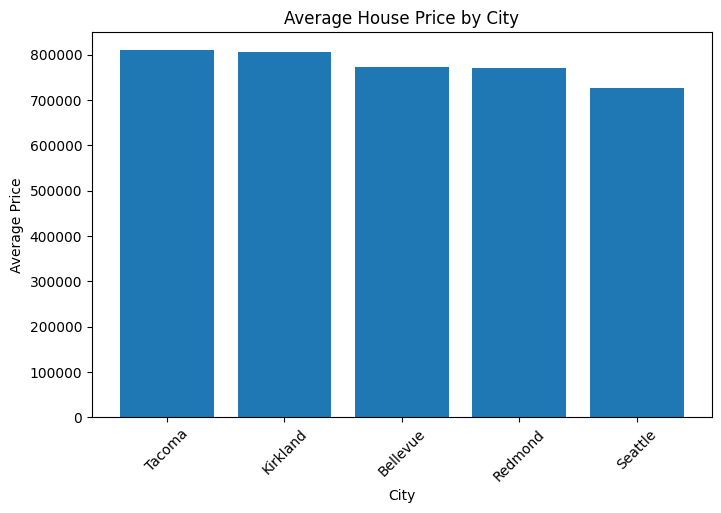

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(city_avg['city'], city_avg['price'])
plt.title('Average House Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()